<a href="https://colab.research.google.com/github/Seunsoipe/Machine-Learning-Algorithms-Checkpoint/blob/main/Machine_Learning_Algorithms_Checkpoint_(Supervised_Learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objective

In this checkpoint, we are going to predict if a patient has chronic kidney disease or not using several classification algorithms of supervised learning. Then we will identify the inherent clusters within our data using clustering algorithms of unsupervised learning.

Instructions

Part1: supervised learning

Load the dataset of kidney disease.


- Apply logistic regression, and print the confusion matrix to validate your model. 

- Apply KNN and choose the optimal number of neighbors

- Apply decision tree, plot it and calculate the accuracy.

- Apply random forest, calculate the new accuracy and compare it with the previous result.

Part2: unsupervised learning

Drop out the target variable (named “classification”)

 - Use hierarchical clustering to identify the inherent groupings within your data.

 - Plot the clusters.

 - Plot the dendrogram. Use k-means clustering and select the optimal k.
 
 - Plot the clusters. 

In [3]:
from google.colab import files

uploaded = files.upload()

Saving kidney_disease.csv to kidney_disease.csv


In [4]:
import pandas as pd

In [50]:
data = pd.read_csv('kidney_disease.csv')

In [52]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


# Renaming the Columns

In [53]:
data.rename(columns={'bp': 'blood_pressure', 'sg': 'specific gravity','al':'albumin','su':'sugar','rbc':'red blood cells','pc':'pus cell','pcc':'pus cell clumps','ba':'bacteria','bgr':'blood glucose random','bu':'blood urea','sc':'serum creatinine','sod':'sodium','pot':'potassium','hemo':'hemoglobin','pcv':'packed cell volume','wc':'white blood cell count','rc':'red blood cell count','htn':'hypertension','dm':'diabetes mellitus','cad':'coronary artery disease','appet':'appetite','pe':'pedal edema','ane':'anemia','classification':'class'},inplace=True)

In [54]:
data.head()

,id,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


# Data Preprocessing

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red blood cells          248 non-null    object 
 7   pus cell                 335 non-null    object 
 8   pus cell clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood glucose random     356 non-null    float64
 11  blood urea               381 non-null    float64
 12  serum creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [56]:
#As we can see packed_cell_volume, white_blood_cell_count and red_blood_cell_count are object type. We need to change them to numerical dtype.

data['packed cell volume'] = pd.to_numeric(data['packed cell volume'], errors='coerce')
data['white blood cell count'] = pd.to_numeric(data['white blood cell count'], errors='coerce')
data['red blood cell count'] = pd.to_numeric(data['red blood cell count'], errors='coerce')

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red blood cells          248 non-null    object 
 7   pus cell                 335 non-null    object 
 8   pus cell clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood glucose random     356 non-null    float64
 11  blood urea               381 non-null    float64
 12  serum creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [58]:
data.describe()

,id,age,blood_pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [59]:
data.drop('id', axis = 1, inplace = True)

data.head()

,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [60]:
# Extracting categorical and numerical columns

cate_col = [col for col in data.columns if data[col].dtype == 'object']
nume_col = [col for col in data.columns if data[col].dtype != 'object']

In [61]:
cate_col

['red blood cells',
 'pus cell',
 'pus cell clumps',
 'bacteria',
 'hypertension',
 'diabetes mellitus',
 'coronary artery disease',
 'appetite',
 'pedal edema',
 'anemia',
 'class']

In [62]:
nume_col

['age',
 'blood_pressure',
 'specific gravity',
 'albumin',
 'sugar',
 'blood glucose random',
 'blood urea',
 'serum creatinine',
 'sodium',
 'potassium',
 'hemoglobin',
 'packed cell volume',
 'white blood cell count',
 'red blood cell count']

In [63]:
data.isnull().sum()

age                          9
blood_pressure              12
specific gravity            47
albumin                     46
sugar                       49
red blood cells            152
pus cell                    65
pus cell clumps              4
bacteria                     4
blood glucose random        44
blood urea                  19
serum creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed cell volume          71
white blood cell count     106
red blood cell count       131
hypertension                 2
diabetes mellitus            2
coronary artery disease      2
appetite                     1
pedal edema                  1
anemia                       1
class                        0
dtype: int64

In [64]:
# Now we look at unique values in categorical columns

for col in cate_col:
    print(f"{col} has {data[col].unique()} values\n")

red blood cells has [nan 'normal' 'abnormal'] values

pus cell has ['normal' 'abnormal' nan] values

pus cell clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary artery disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

pedal edema has ['no' 'yes' nan] values

anemia has ['no' 'yes' nan] values

class has ['ckd' 'ckd\t' 'notckd'] values



In [65]:
#There is some ambiguity as to which columns should be removed.

data['diabetes mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

data['coronary artery disease'] = data['coronary artery disease'].replace(to_replace = '\tno', value='no')

data['class'] = data['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [66]:


data['class'] = data['class'].map({'ckd': 0, 'not ckd': 1})
data['class'] = pd.to_numeric(data['class'], errors='coerce')

In [67]:
#To confirm our changes

cols = ['diabetes mellitus', 'coronary artery disease', 'class']

for col in cols:
    print(f"{col} has {data[col].unique()} values\n")

diabetes mellitus has ['yes' 'no' nan] values

coronary artery disease has ['no' 'yes' nan] values

class has [0 1] values



In [68]:
#Neccesary imports

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 26)

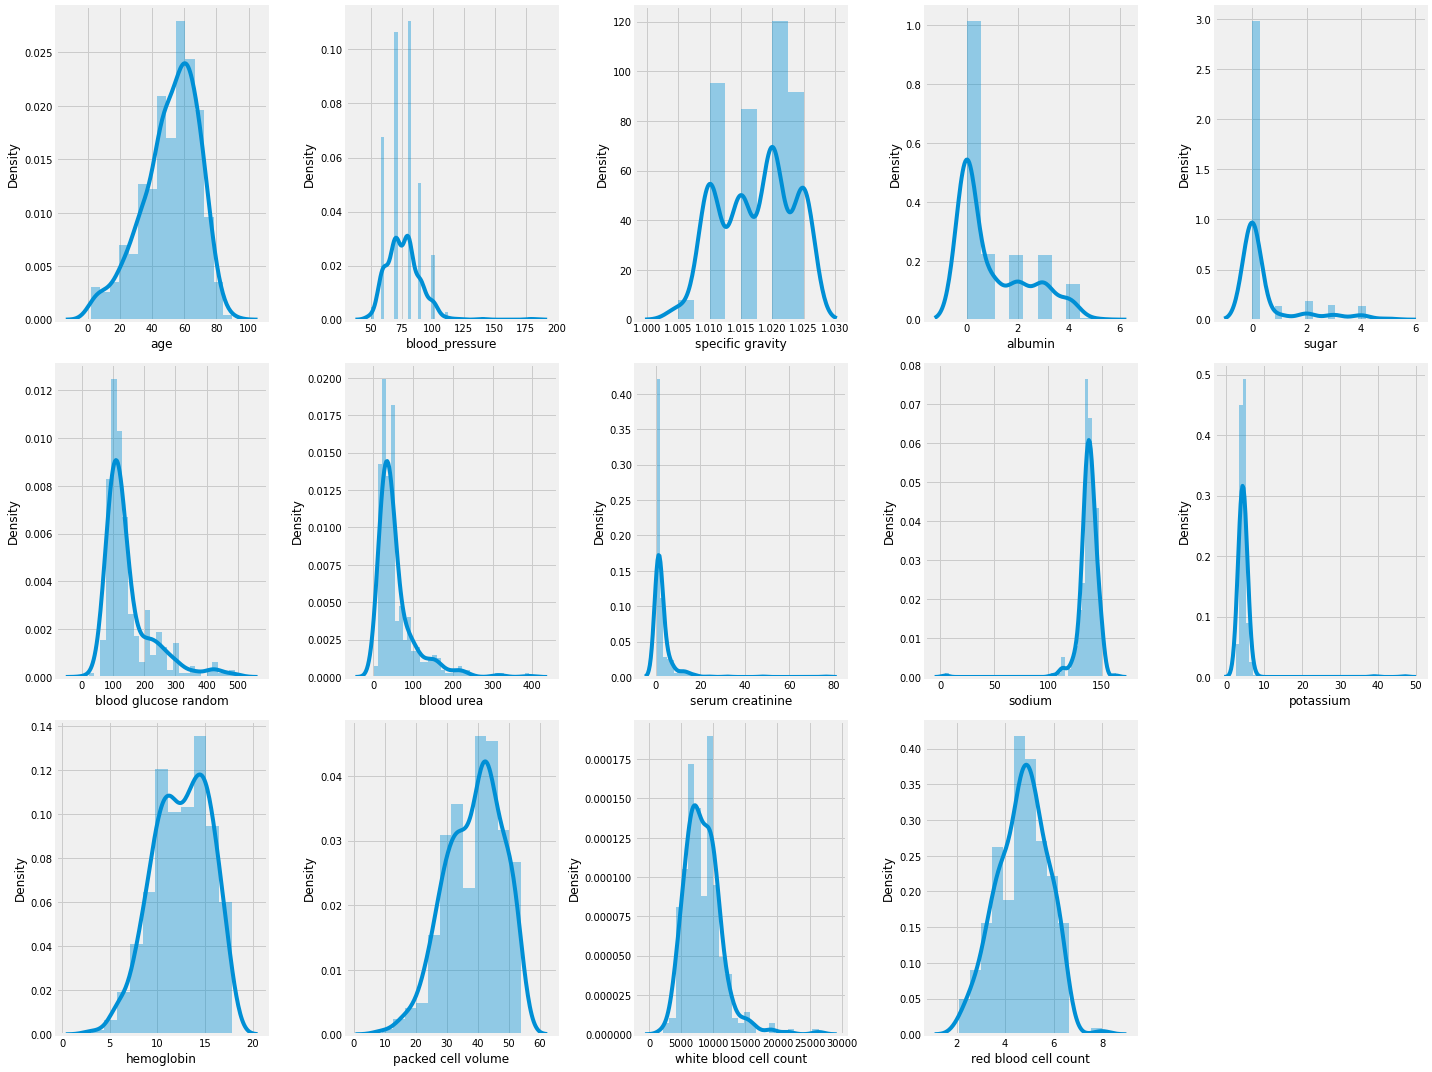

In [69]:
# Validation(Checking) of numerical feature distributions

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in nume_col:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [70]:
#Skewness is present in some of the columns.

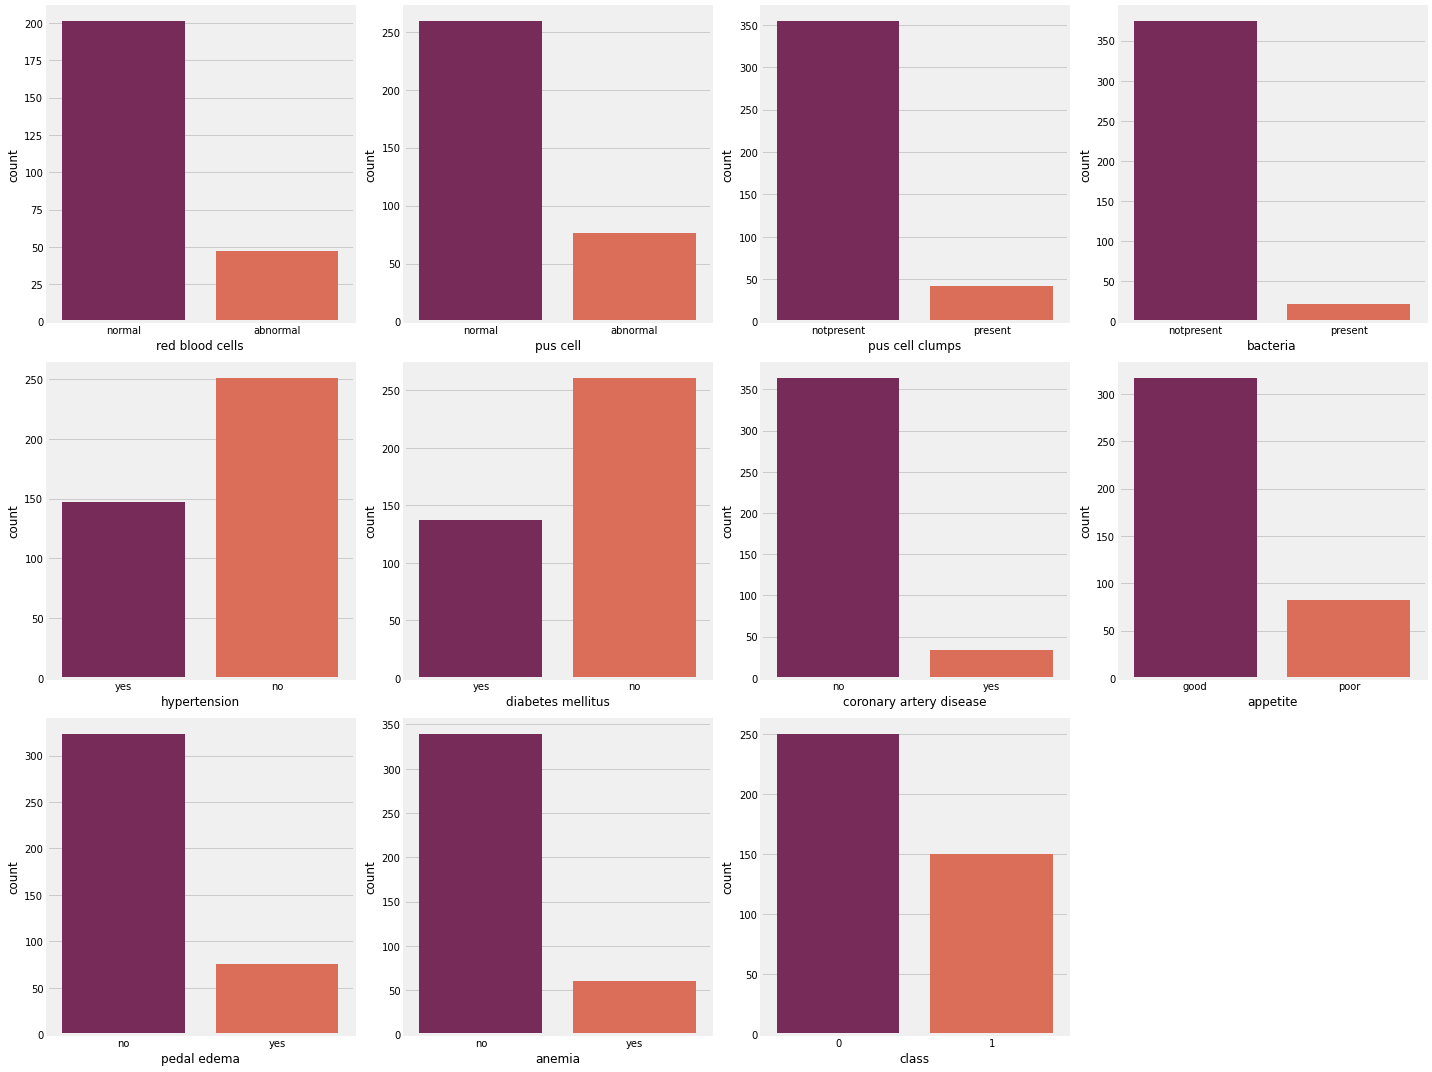

In [71]:
#Visualizing the categorical columns

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in cate_col:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(data[column], palette = 'rocket')
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

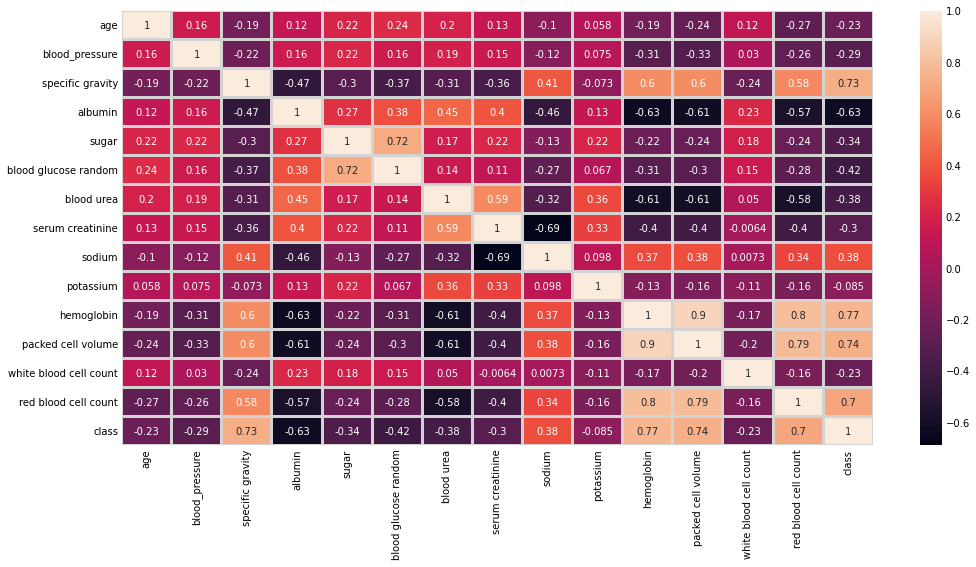

In [72]:
# Visualizing data heatmap

plt.figure(figsize = (15, 8))

sns.heatmap(data.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()

In [73]:
data.columns

Index(['age', 'blood_pressure', 'specific gravity', 'albumin', 'sugar',
       'red blood cells', 'pus cell', 'pus cell clumps', 'bacteria',
       'blood glucose random', 'blood urea', 'serum creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed cell volume',
       'white blood cell count', 'red blood cell count', 'hypertension',
       'diabetes mellitus', 'coronary artery disease', 'appetite',
       'pedal edema', 'anemia', 'class'],
      dtype='object')

## Exploratory Data Analysis

In [74]:
# defining functions to create plot

def violin(col):
    fig = px.violin(data, y=col, x="class", color="class", box=True, template = 'plotly_dark')
    return fig.show()

def kde(col):
    grid = sns.FacetGrid(data, hue="class", height = 6, aspect=2)
    grid.map(sns.kdeplot, col)
    grid.add_legend()
    
def scatter(col1, col2):
    fig = px.scatter(data, x=col1, y=col2, color="class", template = 'plotly_dark')
    return fig.show()

In [75]:
violin('red blood cell count')

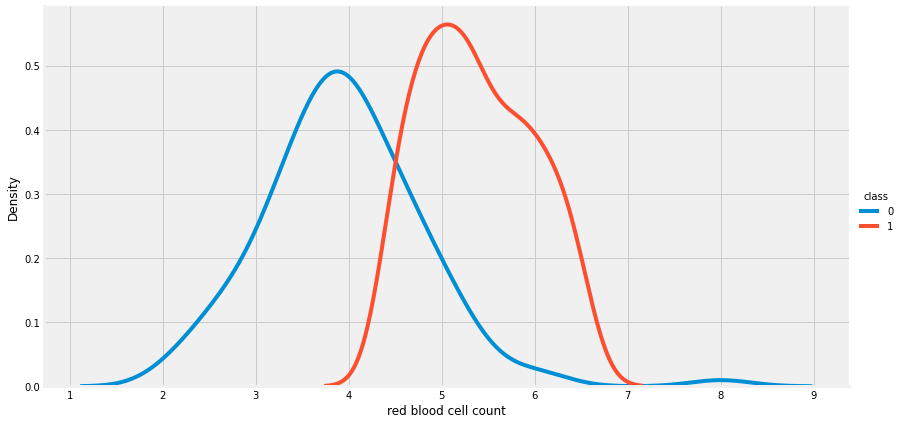

In [76]:
kde('red blood cell count')

In [77]:
violin('white blood cell count')

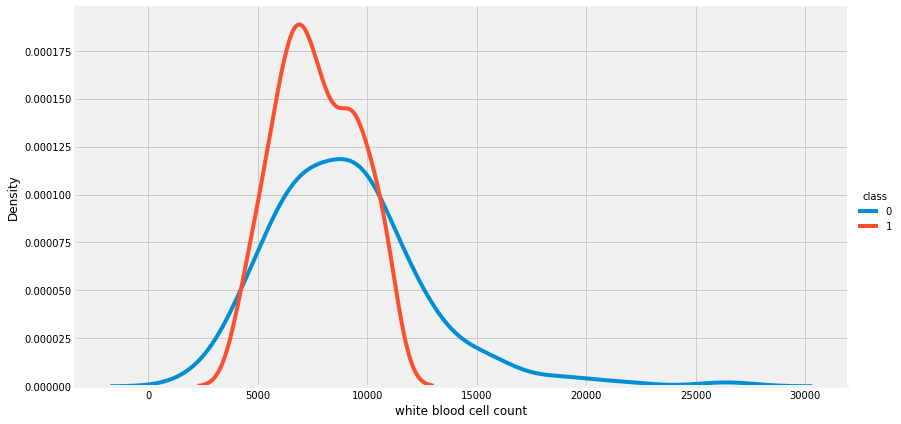

In [78]:
kde('white blood cell count')

In [79]:
violin('packed cell volume')

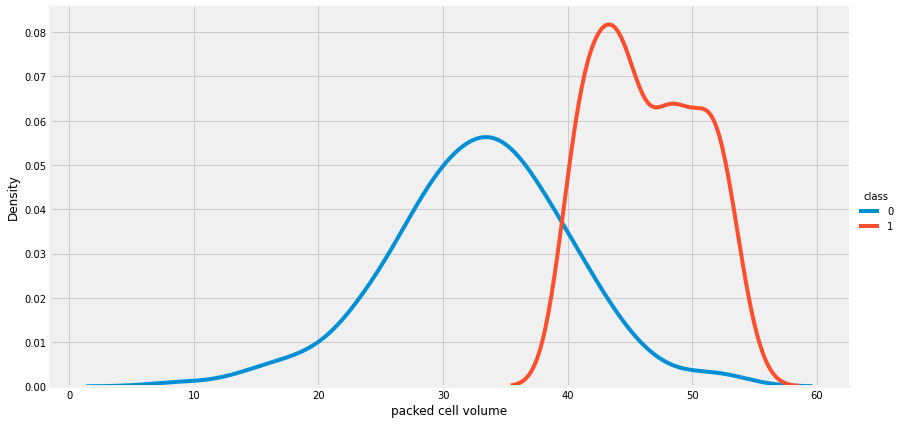

In [80]:
kde('packed cell volume')

In [81]:
violin('hemoglobin')

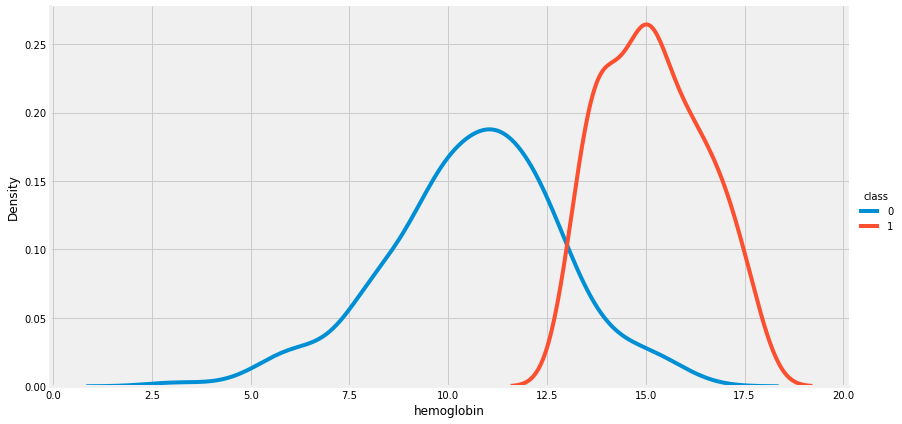

In [82]:
kde('hemoglobin')

In [83]:
violin('albumin')

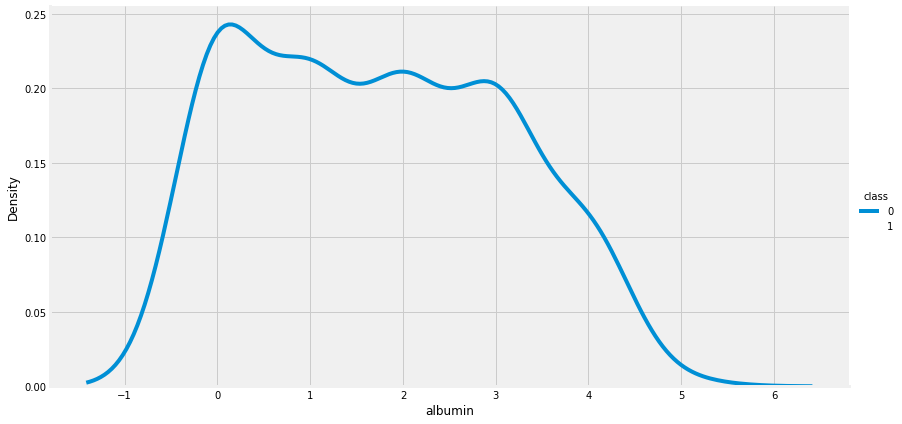

In [84]:
kde('albumin')

In [85]:
violin('specific gravity')

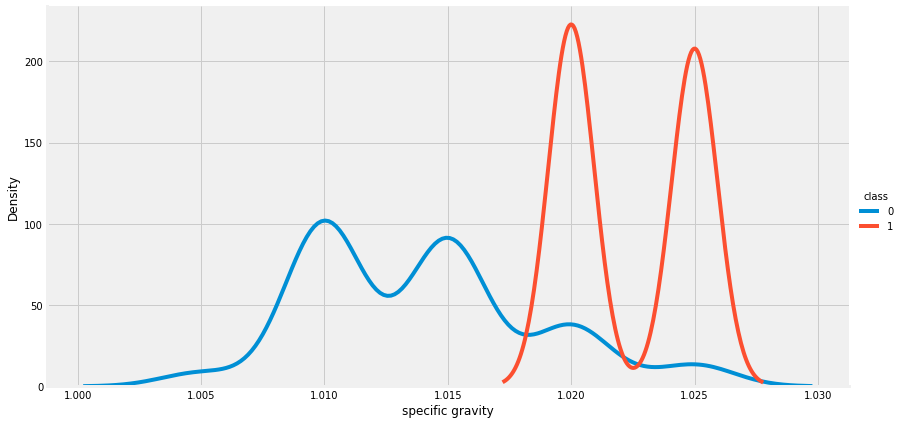

In [86]:
kde('specific gravity')

In [87]:
scatter('hemoglobin', 'packed cell volume')

In [88]:
scatter('red blood cell count', 'packed cell volume')

In [89]:
scatter('red blood cell count', 'albumin')

In [90]:
scatter('sugar', 'blood glucose random')

In [91]:
px.bar(data, x="specific gravity", y="packed cell volume", color='class', barmode='group', template = 'plotly_dark', height = 400)

In [92]:
px.bar(data, x="specific gravity", y="albumin", color='class', barmode='group', template = 'plotly_dark', height = 400)

In [93]:
# checking for null values

data.isna().sum().sort_values(ascending = False)

red blood cells            152
red blood cell count       131
white blood cell count     106
potassium                   88
sodium                      87
packed cell volume          71
pus cell                    65
hemoglobin                  52
sugar                       49
specific gravity            47
albumin                     46
blood glucose random        44
blood urea                  19
serum creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus cell clumps              4
hypertension                 2
diabetes mellitus            2
coronary artery disease      2
appetite                     1
pedal edema                  1
anemia                       1
class                        0
dtype: int64

In [94]:
#Let's check by category

data[cate_col].isnull().sum()

red blood cells            152
pus cell                    65
pus cell clumps              4
bacteria                     4
hypertension                 2
diabetes mellitus            2
coronary artery disease      2
appetite                     1
pedal edema                  1
anemia                       1
class                        0
dtype: int64

In [95]:
data[nume_col].isnull().sum()



age                         9
blood_pressure             12
specific gravity           47
albumin                    46
sugar                      49
blood glucose random       44
blood urea                 19
serum creatinine           17
sodium                     87
potassium                  88
hemoglobin                 52
packed cell volume         71
white blood cell count    106
red blood cell count      131
dtype: int64

In [96]:
# filling null values, we will use two methods, random sampling for higher null values and 
# mean/mode sampling for lower null values

def random_value_imputation(feature):
    random_sample = data[feature].dropna().sample(data[feature].isna().sum())
    random_sample.index = data[data[feature].isnull()].index
    data.loc[data[feature].isnull(), feature] = random_sample
    
def impute_mode(feature):
    mode = data[feature].mode()[0]
    data[feature] = data[feature].fillna(mode)

In [97]:
# filling nume_col null values using random sampling method

for col in nume_col:
    random_value_imputation(col)

In [98]:
data[nume_col].isnull().sum()

age                       0
blood_pressure            0
specific gravity          0
albumin                   0
sugar                     0
blood glucose random      0
blood urea                0
serum creatinine          0
sodium                    0
potassium                 0
hemoglobin                0
packed cell volume        0
white blood cell count    0
red blood cell count      0
dtype: int64

In [100]:
# filling "red_blood_cells" and "pus_cell" using random sampling method and rest of cate_col using mode imputation

random_value_imputation('red blood cells')
random_value_imputation('pus cell')

for col in cate_col:
    impute_mode(col)

In [101]:
#To check 

data[cate_col].isnull().sum()

red blood cells            0
pus cell                   0
pus cell clumps            0
bacteria                   0
hypertension               0
diabetes mellitus          0
coronary artery disease    0
appetite                   0
pedal edema                0
anemia                     0
class                      0
dtype: int64

## Feature Encoding

All missing values ​​were handled. Let's do the feature encoding for the categorical function

In [102]:
for col in cate_col:
    print(f"{col} has {data[col].nunique()} categories\n")

red blood cells has 2 categories

pus cell has 2 categories

pus cell clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes mellitus has 2 categories

coronary artery disease has 2 categories

appetite has 2 categories

pedal edema has 2 categories

anemia has 2 categories

class has 2 categories



In [103]:
#Since all of the categorical columns have 2 categories we can use label encoder

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cate_col:
    data[col] = le.fit_transform(data[col])

In [104]:
#To confirm 

data.head()

,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,1.2,141.0,5.4,15.4,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,0,1,0,0,81.0,18.0,0.8,140.0,3.7,11.3,38.0,6000.0,4.2,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,135.0,4.1,9.6,31.0,7500.0,4.4,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,131.0,4.0,11.6,35.0,7300.0,4.6,0,0,0,0,0,0,0


## Features Selection for the Model



In [105]:
independent_var = [col for col in data.columns if col != 'class']
dependent_var = 'class'

X = data[independent_var]
y = data[dependent_var]

## Data Spliting

In [109]:
# splitting data into training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

## Logistic Regression

In [110]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()   #build our logistic model
logreg.fit(X_train, y_train)  #fitting training data
y_pred  = logreg.predict(X_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(X_test, y_test)))

Accuracy=0.88


Predicted   0   1
Actual           
0          64   8
1           6  42


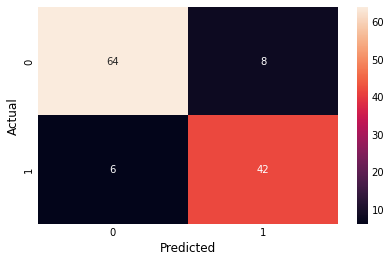

In [111]:
#Printing Confusion Matrix

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

print(confusion_matrix)


In [112]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        72
           1       0.84      0.88      0.86        48

    accuracy                           0.88       120
   macro avg       0.88      0.88      0.88       120
weighted avg       0.88      0.88      0.88       120



## KNN 

In [113]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of knn

knn_acc = accuracy_score(y_test, knn.predict(X_test))

print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, knn.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, knn.predict(X_test))}")

Training Accuracy of KNN is 0.775
Test Accuracy of KNN is 0.6833333333333333 

Confusion Matrix :- 
[[50 22]
 [16 32]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.76      0.69      0.72        72
           1       0.59      0.67      0.63        48

    accuracy                           0.68       120
   macro avg       0.68      0.68      0.68       120
weighted avg       0.69      0.68      0.69       120



In [115]:
n_neighbors=30
scores=[]
for k in range(1,30):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred,y_test),2))
    scores.append(round(accuracy_score(y_pred,y_test),2))


Accuracy for k= 1 is: 0.68
Accuracy for k= 2 is: 0.65
Accuracy for k= 3 is: 0.65
Accuracy for k= 4 is: 0.64
Accuracy for k= 5 is: 0.68
Accuracy for k= 6 is: 0.64
Accuracy for k= 7 is: 0.66
Accuracy for k= 8 is: 0.68
Accuracy for k= 9 is: 0.62
Accuracy for k= 10 is: 0.64
Accuracy for k= 11 is: 0.62
Accuracy for k= 12 is: 0.61
Accuracy for k= 13 is: 0.67
Accuracy for k= 14 is: 0.63
Accuracy for k= 15 is: 0.62
Accuracy for k= 16 is: 0.6
Accuracy for k= 17 is: 0.64
Accuracy for k= 18 is: 0.6
Accuracy for k= 19 is: 0.62
Accuracy for k= 20 is: 0.57
Accuracy for k= 21 is: 0.59
Accuracy for k= 22 is: 0.59
Accuracy for k= 23 is: 0.64
Accuracy for k= 24 is: 0.59
Accuracy for k= 25 is: 0.59
Accuracy for k= 26 is: 0.6
Accuracy for k= 27 is: 0.62
Accuracy for k= 28 is: 0.6
Accuracy for k= 29 is: 0.62


Optimal K Value

Choosing the right value of K can be really tricky, one of the ways to make that process easier is running a "for loop" and trying out different values of K. And then we choose the lowest one which has the highest accuracy.

In Best Pratice your k value should be old.

The lowest one which has the highest accuracy will K = 1

Text(0, 0.5, 'Testing Accuracy')

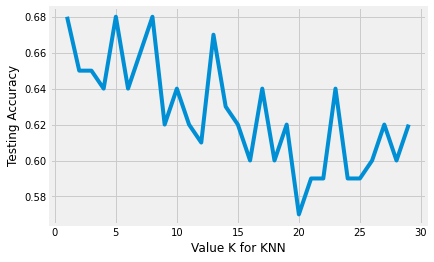

In [116]:
plt.plot(range(1,30), scores)
plt.xlabel('Value K for KNN')
plt.ylabel('Testing Accuracy')

## Decision Tree Classifier

In [114]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.95 

Confusion Matrix :- 
[[72  0]
 [ 6 42]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        72
           1       1.00      0.88      0.93        48

    accuracy                           0.95       120
   macro avg       0.96      0.94      0.95       120
weighted avg       0.95      0.95      0.95       120



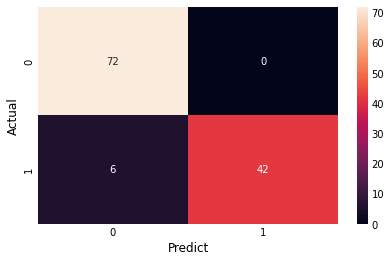

In [118]:
confusion_matrix = pd.crosstab(y_test, dtc.predict(X_test), rownames = ['Actual'], colnames = ['Predict'])
sns.heatmap(confusion_matrix, annot = True)


##Decision Tree Confusion Matrix Interpretation:

People without kidney disease, the model correctly predicted 72 people.

Also, 6 with renal disease were predicted not to have renal disease by model.

42 were correctly predicted to have kidney disease

In [120]:
# Tree Visualization
import graphviz
from sklearn import tree

dec_tree = tree.export_graphviz(dtc.fit(X_train, y_train), out_file=None,)


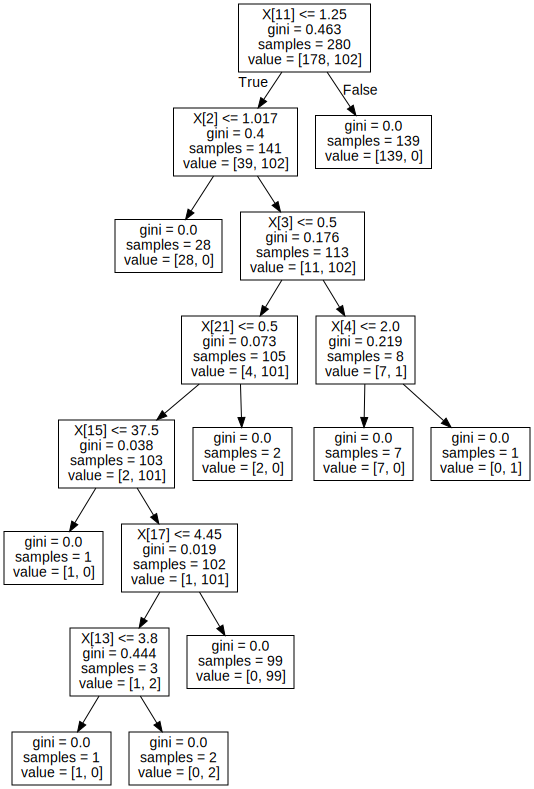

In [121]:
graph = graphviz.Source(dec_tree)
graph.render('data')
graph

## Random Forest Classifier

In [123]:
from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 11, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rd_clf.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of random forest

rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))

print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rd_clf.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc} \n")



Training Accuracy of Random Forest Classifier is 1.0
Test Accuracy of Random Forest Classifier is 0.975 



In [126]:

print(f"Classification Report :- \n {classification_report(y_test, rd_clf.predict(X_test))}")

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.94      0.97        48

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



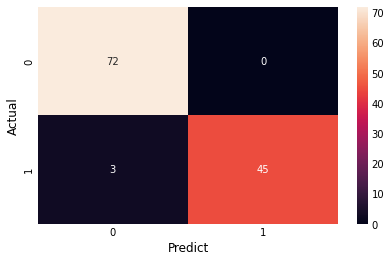

In [131]:
confusion_matrix = pd.crosstab(y_test, rd_clf.predict(X_test), rownames = ['Actual'], colnames = ['Predict'])
sns.heatmap(confusion_matrix, annot = True)

## Ada Boost Classifier

In [129]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator = dtc)
ada.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of ada boost

ada_acc = accuracy_score(y_test, ada.predict(X_test))

print(f"Training Accuracy of Ada Boost Classifier is {accuracy_score(y_train, ada.predict(X_train))}")
print(f"Test Accuracy of Ada Boost Classifier is {ada_acc} \n")



print(f"Classification Report :- \n {classification_report(y_test, ada.predict(X_test))}")

Training Accuracy of Ada Boost Classifier is 1.0
Test Accuracy of Ada Boost Classifier is 0.95 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        72
           1       1.00      0.88      0.93        48

    accuracy                           0.95       120
   macro avg       0.96      0.94      0.95       120
weighted avg       0.95      0.95      0.95       120



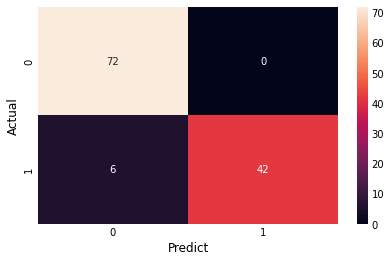

In [130]:
confusion_matrix = pd.crosstab(y_test, ada.predict(X_test), rownames = ['Actual'], colnames = ['Predict'])
sns.heatmap(confusion_matrix, annot = True)

## Gradient Boosting Classifier

In [133]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of gradient boosting classifier

gb_acc = accuracy_score(y_test, gb.predict(X_test))

print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(y_train, gb.predict(X_train))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {gb_acc} \n")

print(f"Classification Report :- \n {classification_report(y_test, gb.predict(X_test))}")

Training Accuracy of Gradient Boosting Classifier is 1.0
Test Accuracy of Gradient Boosting Classifier is 0.9833333333333333 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.96      0.98        48

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



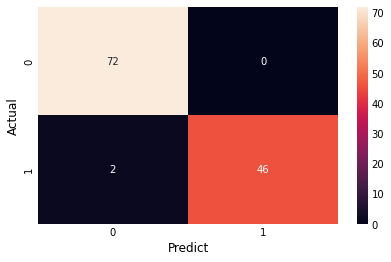

In [134]:
confusion_matrix = pd.crosstab(y_test, gb.predict(X_test), rownames = ['Actual'], colnames = ['Predict'])
sns.heatmap(confusion_matrix, annot = True)

## Stochastic Gradient Boosting (SGB)

In [135]:
sgb = GradientBoostingClassifier(max_depth = 4, subsample = 0.90, max_features = 0.75, n_estimators = 200)
sgb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of stochastic gradient boosting classifier

sgb_acc = accuracy_score(y_test, sgb.predict(X_test))

print(f"Training Accuracy of Stochastic Gradient Boosting is {accuracy_score(y_train, sgb.predict(X_train))}")
print(f"Test Accuracy of Stochastic Gradient Boosting is {sgb_acc} \n")


print(f"Classification Report :- \n {classification_report(y_test, sgb.predict(X_test))}")

Training Accuracy of Stochastic Gradient Boosting is 1.0
Test Accuracy of Stochastic Gradient Boosting is 0.9833333333333333 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.96      0.98        48

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



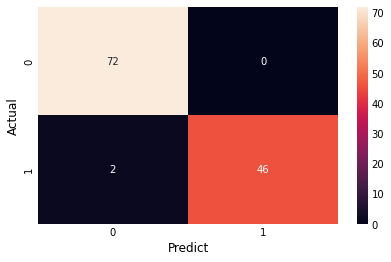

In [136]:
confusion_matrix = pd.crosstab(y_test, sgb.predict(X_test), rownames = ['Actual'], colnames = ['Predict'])
sns.heatmap(confusion_matrix, annot = True)

## XgBoost

In [137]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.5, max_depth = 5, n_estimators = 150)
xgb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of xgboost

xgb_acc = accuracy_score(y_test, xgb.predict(X_test))

print(f"Training Accuracy of XgBoost is {accuracy_score(y_train, xgb.predict(X_train))}")
print(f"Test Accuracy of XgBoost is {xgb_acc} \n")


print(f"Classification Report :- \n {classification_report(y_test, xgb.predict(X_test))}")

Training Accuracy of XgBoost is 1.0
Test Accuracy of XgBoost is 0.9583333333333334 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        72
           1       1.00      0.90      0.95        48

    accuracy                           0.96       120
   macro avg       0.97      0.95      0.96       120
weighted avg       0.96      0.96      0.96       120



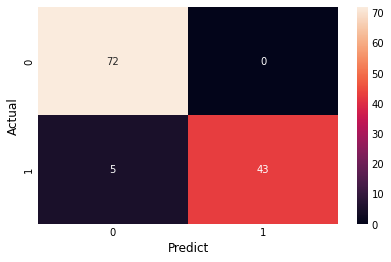

In [138]:
confusion_matrix = pd.crosstab(y_test, xgb.predict(X_test), rownames = ['Actual'], colnames = ['Predict'])
sns.heatmap(confusion_matrix, annot = True)

## Cat Boost Classifier

In [140]:
!pip install catboost



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 
Learning rate set to 0.408198
0:	learn: 0.2980553	total: 49.1ms	remaining: 442ms
1:	learn: 0.1684461	total: 51.4ms	remaining: 206ms
2:	learn: 0.1043875	total: 52.7ms	remaining: 123ms
3:	learn: 0.0709011	total: 54.8ms	remaining: 82.3ms
4:	learn: 0.0554975	total: 57ms	remaining: 57ms
5:	learn: 0.0404804	total: 59.5ms	remaining: 39.6ms
6:	learn: 0.0333256	total: 61.6ms	remaining: 26.4ms
7:	learn: 0.0301165	total: 63.7ms	remaining: 15.9ms
8:	learn: 0.0233327	total: 65.9ms	remaining: 7.33ms
9:	learn: 0.0183781	total: 68.2ms	remaining: 0us


In [141]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(iterations=10)
cat.fit(X_train, y_train)

Learning rate set to 0.408198
0:	learn: 0.2980553	total: 6.13ms	remaining: 55.2ms
1:	learn: 0.1684461	total: 12ms	remaining: 48ms
2:	learn: 0.1043875	total: 13.8ms	remaining: 32.2ms
3:	learn: 0.0709011	total: 20.4ms	remaining: 30.5ms
4:	learn: 0.0554975	total: 23.6ms	remaining: 23.6ms
5:	learn: 0.0404804	total: 29.3ms	remaining: 19.5ms
6:	learn: 0.0333256	total: 34.8ms	remaining: 14.9ms
7:	learn: 0.0301165	total: 40.5ms	remaining: 10.1ms
8:	learn: 0.0233327	total: 46.2ms	remaining: 5.13ms
9:	learn: 0.0183781	total: 52.5ms	remaining: 0us


In [143]:
# accuracy score, confusion matrix and classification report of cat boost

cat_acc = accuracy_score(y_test, cat.predict(X_test))

print(f"Training Accuracy of Cat Boost Classifier is {accuracy_score(y_train, cat.predict(X_train))}")
print(f"Test Accuracy of Cat Boost Classifier is {cat_acc} \n")


print(f"Classification Report :- \n {classification_report(y_test, cat.predict(X_test))}")

Training Accuracy of Cat Boost Classifier is 1.0
Test Accuracy of Cat Boost Classifier is 0.975 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98        72
           1       0.96      0.98      0.97        48

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120



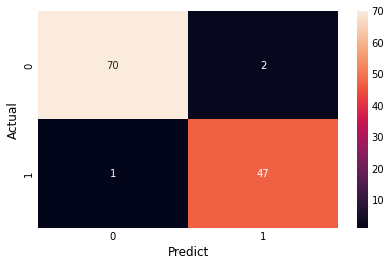

In [144]:
confusion_matrix = pd.crosstab(y_test, cat.predict(X_test), rownames = ['Actual'], colnames = ['Predict'])
sns.heatmap(confusion_matrix, annot = True)

## Extra Trees Classifier



In [146]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of extra trees classifier

etc_acc = accuracy_score(y_test, etc.predict(X_test))

print(f"Training Accuracy of Extra Trees Classifier is {accuracy_score(y_train, etc.predict(X_train))}")
print(f"Test Accuracy of Extra Trees Classifier is {etc_acc} \n")


print(f"Classification Report :- \n {classification_report(y_test, etc.predict(X_test))}")

Training Accuracy of Extra Trees Classifier is 1.0
Test Accuracy of Extra Trees Classifier is 0.9583333333333334 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        72
           1       1.00      0.90      0.95        48

    accuracy                           0.96       120
   macro avg       0.97      0.95      0.96       120
weighted avg       0.96      0.96      0.96       120



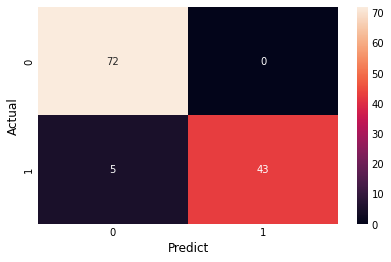

In [147]:
confusion_matrix = pd.crosstab(y_test, etc.predict(X_test), rownames = ['Actual'], colnames = ['Predict'])
sns.heatmap(confusion_matrix, annot = True)

## Light GBM Classifier

In [148]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(learning_rate = 1)
lgbm.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of lgbm classifier

lgbm_acc = accuracy_score(y_test, lgbm.predict(X_test))

print(f"Training Accuracy of LGBM Classifier is {accuracy_score(y_train, lgbm.predict(X_train))}")
print(f"Test Accuracy of LGBM Classifier is {lgbm_acc} \n")


print(classification_report(y_test, lgbm.predict(X_test)))

Training Accuracy of LGBM Classifier is 1.0
Test Accuracy of LGBM Classifier is 0.975 

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.94      0.97        48

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



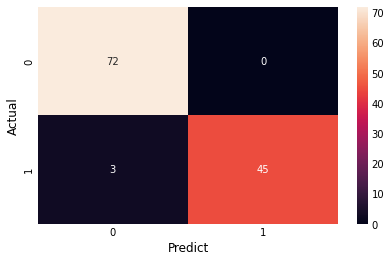

In [149]:
confusion_matrix = pd.crosstab(y_test, lgbm.predict(X_test), rownames = ['Actual'], colnames = ['Predict'])
sns.heatmap(confusion_matrix, annot = True)

## Models Comparison



In [151]:
models = pd.DataFrame({
    'Model' : [ 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boost Classifier',
             'Gradient Boosting Classifier', 'Stochastic Gradient Boosting', 'XgBoost', 'Cat Boost', 'Extra Trees Classifier'],
    'Score' : [knn_acc, dtc_acc, rd_clf_acc, ada_acc, gb_acc, sgb_acc, xgb_acc, cat_acc, etc_acc]
})


models.sort_values(by = 'Score', ascending = True)

,Model,Score
0,KNN,0.683333
1,Decision Tree Classifier,0.950000
3,Ada Boost Classifier,0.950000
6,XgBoost,0.958333
8,Extra Trees Classifier,0.958333
2,Random Forest Classifier,0.975000
7,Cat Boost,0.975000
4,Gradient Boosting Classifier,0.983333
5,Stochastic Gradient Boosting,0.983333


In [152]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', 
       title = 'Models Comparison')

## Supervised Learning Conclusion

Of all the models tested, Gradient Boosting Classifier and Stochastic Gradient Boosting has the highest accuracy with 98%, followed by Random Forest and Cat Boost with 97%, kNN was the lowest accuracy with 81%.